In [32]:
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.ticker as ticker

In [33]:
# kd_csv_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Supervision_SUM_image2D_KD_baseline_20220608-223236/metrics.csv"
kd_csv_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Supervision_SUM_image2D_KD_20220629-152906/metrics.csv"
kd_df = pd.read_csv (kd_csv_path, sep='\t')

unsup_csv_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/label_only_20220522-030603/metrics.csv"
unsup_df = pd.read_csv (unsup_csv_path, sep='\t')

In [34]:
kd_train_loss = np.asarray(kd_df['train_cls_loss']) * 2
kd_test_loss = np.asarray(kd_df['test_cls_loss'])  * 2
kd_test_acc = np.asarray(kd_df['test_acc']) 


unsup_train_loss = np.asarray(unsup_df['train_loss'])  * 2
unsup_test_loss = np.asarray(unsup_df['test_loss']) * 2
unsup_test_acc = np.asarray(unsup_df['precision'])

In [35]:
acc = np.asarray([98.41, 94.64, 92.86, 95.24])
mean = np.mean(acc)
err = np.std(acc)

x = np.arange(1,51,1)
y = np.asarray([mean] * 50)


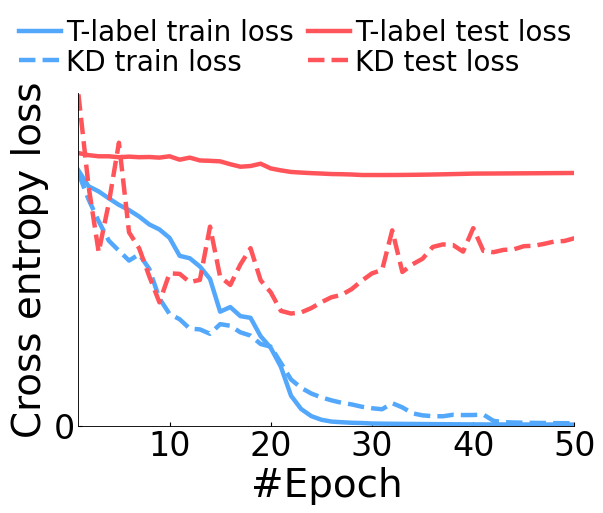

In [38]:

# ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
# landmark + label overfitting
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5.5), dpi=80)
name1 = "KD"
name2 = "T-label"

lw = 4

ax.plot(x, unsup_train_loss, color=colors[0], linestyle='solid',
        fillstyle='none', label='{} train loss'.format(name2), linewidth=lw)
ax.plot(x, kd_train_loss, color=colors[0], linestyle='dashed',
        label='{} train loss'.format(name1), linewidth=lw)

ax.plot(x, unsup_test_loss, color=colors[5], linestyle='solid',
        fillstyle='none', label='{} test loss'.format(name2), linewidth=lw)
ax.plot(x, kd_test_loss, color=colors[5], linestyle='dashed',
        label='{} test loss'.format(name1), linewidth=lw)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel("Cross entropy loss", fontsize=35)
ax.set_xlabel("#Epoch", fontsize=35)

ax.set_xlim(1, 50)
ax.set_ylim(0,5)
handles, labels = ax.get_legend_handles_labels()
H = handles
L = labels

ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

l1 = ax.legend(H, L, loc="upper left", prop={'size': 25, }, ncol=2, bbox_to_anchor=(-0.17, 1.3), fancybox=True,
               framealpha=0.0, labelspacing=0.05, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/limiteddata_1.svg', format='svg', bbox_inches="tight")



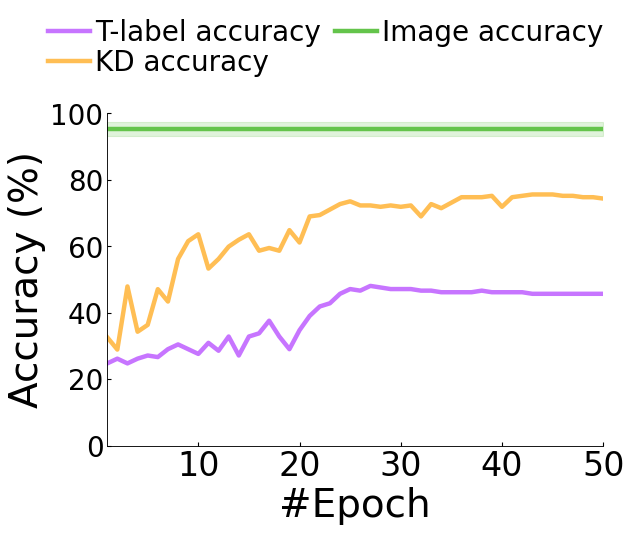

In [37]:
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF", '#FFBE54']
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5.5), dpi=80)

name1 = "KD"
name2 = "T-label"

lw = 4


ax1.plot(x, unsup_test_acc, color=colors[6],  linestyle='solid',
         label='{} accuracy'.format(name2), linewidth=lw)
ax1.plot(x, kd_test_acc, color=colors[-1],  linestyle='solid',
         label='{} accuracy'.format(name1), linewidth=lw)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


ax1.set_xlabel("#Epoch", fontsize=35)
ax1.set_ylabel("Accuracy (%)", fontsize=35)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.set_xlim(1, 50)




ax1.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax1.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20))

ax1.plot(x, y, colors[2],  linestyle='-', lw=lw, label='Image accuracy')
ax1.fill_between(x, y-err, y+err, alpha=0.2,
                 edgecolor=colors[2], facecolor=colors[2])
new_handles, new_labels = ax1.get_legend_handles_labels()


l2 = ax1.legend(new_handles, new_labels, loc="upper left", prop={'size': 25, }, ncol=2, bbox_to_anchor=(-0.17, 1.36), fancybox=True,
               framealpha=0.0, labelspacing=0.05, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/limiteddata.pdf', format='pdf', bbox_inches="tight")
fig1.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/limiteddata_2.svg', format='svg', bbox_inches="tight")



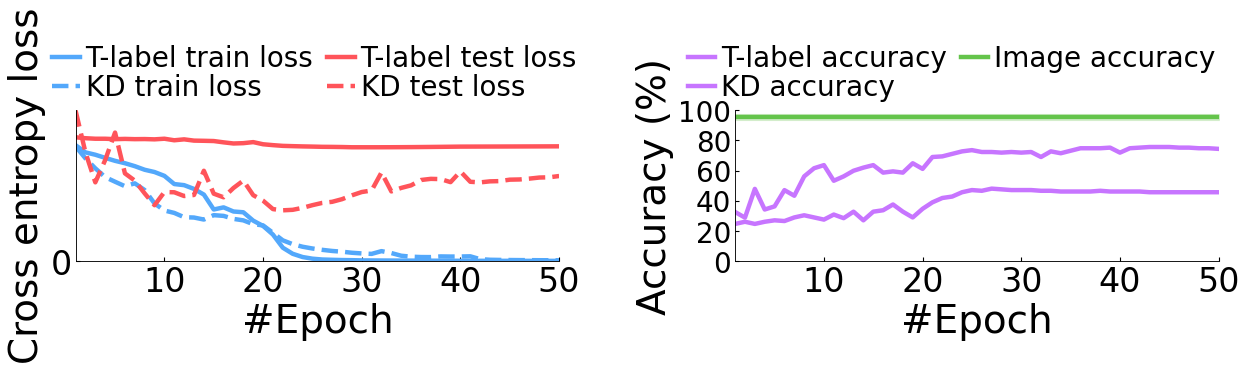

In [30]:
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5), dpi=80)
name1 = "KD"
name2 = "T-label"

lw = 4

ax.plot(x, unsup_train_loss, color=colors[0], linestyle='solid',
        fillstyle='none', label='{} train loss'.format(name2), linewidth=lw)
ax.plot(x, kd_train_loss, color=colors[0], linestyle='dashed',
        label='{} train loss'.format(name1), linewidth=lw)

ax.plot(x, unsup_test_loss, color=colors[5], linestyle='solid',
        fillstyle='none', label='{} test loss'.format(name2), linewidth=lw)
ax.plot(x, kd_test_loss, color=colors[5], linestyle='dashed',
        label='{} test loss'.format(name1), linewidth=lw)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel("Cross entropy loss", fontsize=35)
ax.set_xlabel("#Epoch", fontsize=35)

ax.set_xlim(1, 50)
ax.set_ylim(0,5)
handles, labels = ax.get_legend_handles_labels()
H = handles
L = labels

ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

l1 = ax.legend(H, L, loc="upper left", prop={'size': 25, }, ncol=2, bbox_to_anchor=(-0.10, 1.6), fancybox=True,
               framealpha=0.0, labelspacing=0.05, handletextpad=0.2, columnspacing=0.5, handlelength=1.0)


name1 = "KD"
name2 = "T-label"

lw = 4


ax1.plot(x, unsup_test_acc, color=colors[6],  linestyle='solid',
         label='{} accuracy'.format(name2), linewidth=lw)
ax1.plot(x, kd_test_acc, color=colors[-1],  linestyle='solid',
         label='{} accuracy'.format(name1), linewidth=lw)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


ax1.set_xlabel("#Epoch", fontsize=35)
ax1.set_ylabel("Accuracy (%)", fontsize=35)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.set_xlim(1, 50)




ax1.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax1.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20))

ax1.plot(x, y, colors[2],  linestyle='-', lw=lw, label='Image accuracy')
ax1.fill_between(x, y-err, y+err, alpha=0.2,
                 edgecolor=colors[2], facecolor=colors[2])
new_handles, new_labels = ax1.get_legend_handles_labels()


l2 = ax1.legend(new_handles, new_labels, loc="upper left", prop={'size': 25, }, ncol=2, bbox_to_anchor=(-0.15, 1.6), fancybox=True,
               framealpha=0.0, labelspacing=0.05, handletextpad=0.2, columnspacing=0.5, handlelength=1.0)

# plt.subplots_adjust(left=0.0,
#                     bottom=0.0, 
#                     right=0.5, 
#                     top=0.5, 
#                     wspace=0.3, 
#                     hspace=0.4)

fig.tight_layout()
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/limiteddata.svg', format='svg', bbox_inches="tight")

In [3]:
np_path = "C:/Users/Zber/Desktop/Subjects_Heatmap_new/S1/Anger_0_ele.npy"
d = np.load(np_path)
d.shape

(300, 91, 10)

### Wearing Results

In [41]:
#wearing results

emotion_list = ['Neutral', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
res_root = "C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar\\FER\\results"
# res_folder = "Evaluate_olddata_ours_W_1_2_3_v2_20220530-174743"
# res_folder = "Evaluate_olddata_ours_W_1_2_3_v1_20220530-173637"
# res_folder = "Evaluate_olddata_ours_W_1_2_3_v4_20220530-185201"
# res_folder = "Evaluate_olddata_ours_W_1_2_3_v3_20220530-184812"
res_folder = "Evaluate_olddata_ours_W_1_2_3_20220530-190129"
folder_path = os.path.join(res_root, res_folder)
ann_file = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_test_W1_2_3.txt"
subs = []
df = pd.read_csv (os.path.join(folder_path, "metrics.csv"), sep='\t')
with open(ann_file) as f:
    sub_file = f.readlines()

for s in sub_file:
    subs.append(s[:s.index('/')])

# print(subs)
predict = np.asarray(df['predict'])
target = np.asarray(df['target'])

n_w1 = subs.count("W1")
n_w2 = subs.count('W2')


w1_predict = predict[:n_w1].astype(int)
w1_target = target[:n_w1].astype(int)

w2_predict = predict[n_w1:n_w2+n_w1].astype(int)
w2_target = target[n_w1:n_w2+n_w1].astype(int)


w3_predict = predict[n_w2+n_w1:].astype(int)
w3_target = target[n_w2+n_w1:].astype(int)


w1_p, w1_r, w1_f, w1_s = metrics.precision_recall_fscore_support(w1_target, w1_predict, average='macro')
w2_p, w2_r, w2_f, w2_s = metrics.precision_recall_fscore_support(w2_target, w2_predict, average='macro')
w3_p, w3_r, w3_f, w3_s = metrics.precision_recall_fscore_support(w3_target, w3_predict, average='macro')
# w1_p = metrics.precision_recall_fscore_support(w1_target, w1_predict, labels=emotion_list, average='macro')
# w1_p= metrics.accuracy_score(w1_target, w1_predict)
# w2_p= metrics.accuracy_score(w2_target, w2_predict)
# w3_p= metrics.accuracy_score(w3_target, w3_predict)


# print(w1_p)
# print(w2_p)
# print(w3_p)


print(w1_predict)
print(w1_target)


print(w2_predict)
print(w2_target)


print(w3_predict)
print(w3_target)

print(w1_p)
print(w2_p)
print(w3_p)






[0 3 3 1 1 1 2 2 2 3 6 3 4 4 4 6 5 6 1 5 6]
[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
[0 0 4 1 1 1 2 2 6 6 3 3 4 4 4 6 5 5 6 6 6]
[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
[0 0 0 1 3 1 2 2 2 3 1 3 4 4 4 5 5 5 6 3 3]
[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
0.7142857142857143
0.8928571428571429
0.8666666666666666


In [2]:
np_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\S2\\Anger_0_azi.npy"
data = np.load(np_path)
data.shape

(300, 91, 10)

In [7]:
csv_path ='C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Supervision_SUM_image2D_KD_baseline_20220608-153433/metrics.csv'
df = pd.read_csv (csv_path, sep='\t')

In [20]:
path = 'C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar\\FER\\em_plot\\clouds_points.npy'
data = np.load(path)
# frame_id = 50  
# id = 50 * 4 + 2
data.shape

(4, 893)

In [41]:
mask_t = (data[0] == 4)
mask_tt = (data[0] == 5)
mask_ttt =  (data[0] == 6)


z_t=data[1,mask_t]
y_t=data[2,mask_t]
x_t=data[3,mask_t]

z_tt=data[1,mask_tt]
y_tt=data[2,mask_tt]
x_tt=data[3,mask_tt]


z_ttt=data[1,mask_ttt]
y_ttt=data[2,mask_ttt]
x_ttt=data[3,mask_ttt]

In [44]:
z_t=data[1,mask_t]
y_t=data[2,mask_t]
x_t=data[3,mask_t]

z_tt=data[1,mask_tt]
y_tt=data[2,mask_tt]
x_tt=data[3,mask_tt]


z_ttt=data[1,mask_ttt]
y_ttt=data[2,mask_ttt]
x_ttt=data[3,mask_ttt]

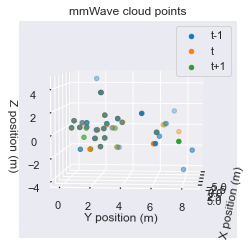

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = x_t, ys = y_t, zs = z_t, c='tab:blue' , label='t-1')
ax.scatter(xs = x_tt, ys = y_tt, zs = z_tt, c='tab:orange' , label='t')
ax.scatter(xs = x_ttt, ys = y_ttt, zs = z_ttt, c='tab:green' , label='t+1')
ax.set_title("mmWave cloud points")

ax.set_xlabel("X position (m)")

ax.set_ylabel("Y position (m)")

ax.set_zlabel("Z position (m)")

ax.legend()

ax.view_init(elev=5, azim=5)

In [32]:
gender_labels = np.random.choice([0, 1], 35)
gender_labels

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])